In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('C:/Users/Sampada/Downloads/apples_and_oranges.csv')
df.keys()

Index(['Weight', 'Size', 'Class'], dtype='object')

In [33]:
print(df['Weight'])

0     69
1     69
2     65
3     72
4     67
5     73
6     70
7     75
8     74
9     65
10    73
11    70
12    74
13    68
14    74
15    65
16    69
17    75
18    67
19    74
20    66
21    70
22    69
23    68
24    67
25    71
26    67
27    70
28    74
29    71
30    73
31    66
32    72
33    73
34    68
35    69
36    69
37    74
38    70
39    73
Name: Weight, dtype: int64


In [34]:
print(df['Size'])

0     4.39
1     4.21
2     4.09
3     5.85
4     4.70
5     5.68
6     5.56
7     5.11
8     5.36
9     4.27
10    5.79
11    5.47
12    5.53
13    4.47
14    5.22
15    4.48
16    4.66
17    5.25
18    4.18
19    5.50
20    4.13
21    4.83
22    4.61
23    4.08
24    4.25
25    5.35
26    4.01
27    4.22
28    5.25
29    5.26
30    5.78
31    4.68
32    5.72
33    5.17
34    4.83
35    4.11
36    4.76
37    5.48
38    5.59
39    5.03
Name: Size, dtype: float64


In [35]:
print(df['Class'])

0     orange
1     orange
2     orange
3      apple
4     orange
5      apple
6      apple
7      apple
8      apple
9     orange
10     apple
11     apple
12     apple
13    orange
14     apple
15    orange
16    orange
17     apple
18    orange
19     apple
20    orange
21    orange
22    orange
23    orange
24    orange
25     apple
26    orange
27    orange
28     apple
29     apple
30     apple
31    orange
32     apple
33     apple
34    orange
35    orange
36    orange
37     apple
38     apple
39     apple
Name: Class, dtype: object


In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Weight'] = le.fit_transform(df.Weight)
df['Size'] = le.fit_transform(df.Size)
df['Class'] = le.fit_transform(df.Class)
df.head()

,Weight,Size,Class
0,4,10,1
1,4,6,1
2,0,2,1
3,7,37,0
4,2,16,1


In [37]:
x=df.iloc[:,0:2]
x=np.asarray(x)
x
y=df['Class']
y = np.asarray(y)
y

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [38]:
# split of train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(y_train)

[0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0]


In [39]:
from sklearn.svm import SVC
model = SVC()

In [40]:
model.fit(x_train,y_train)

C:\Users\Sampada\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
predictions=model.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,predictions))

[[6 0]
 [0 6]]


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [45]:
param_grid={'C':[0.1,1,10,100,10000],'gamma':[1,0.1,0.01,0.001,0.00001],'kernel':['rbf']}

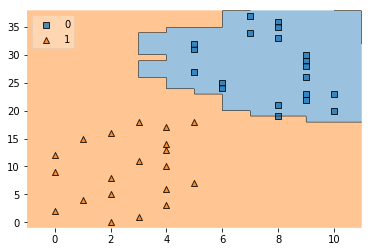

In [57]:
plot_decision_regions(x,y,clf = model,legend=2)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)


In [48]:
grid.fit(x_train,y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ......... C

C:\Users\Sampada\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
C:\Users\Sampada\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 1e-05], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [49]:
grid.best_params_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [50]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
grid_prediction=grid.predict(x_test)


In [52]:
print(confusion_matrix(y_test,grid_prediction))


[[6 0]
 [0 6]]


In [53]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [54]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

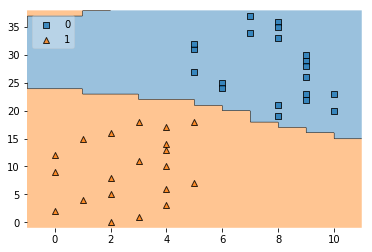

In [56]:
plot_decision_regions(x,y,clf = grid,legend=2)